# Importing Libraries

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import model_class as mc
import numpy as np
import pandas as pd

# Data Exploration

In [2]:
# Import the dataset
data = pd.read_csv('train.csv')

In [3]:
# Display the first few rows of the dataset
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Display the shape of the dataset
data.shape

(42000, 785)

In [5]:
# Display the unique values in the label column
data["label"].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [6]:
# Display the distribution of the labels
data["label"].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [7]:
def plot_images(data, labels, num_images=10):
    """
    Plots a specified number of images along with their corresponding labels.

    Arguments:
    data -- Array containing image data
    labels -- Array containing labels corresponding to the images
    num_images -- Number of images to plot
    """
    fig, axes = plt.subplots(1, num_images, figsize=(15, 4))
    for i in range(num_images):
        axes[i].imshow(data[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'Label: {labels[i]}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()


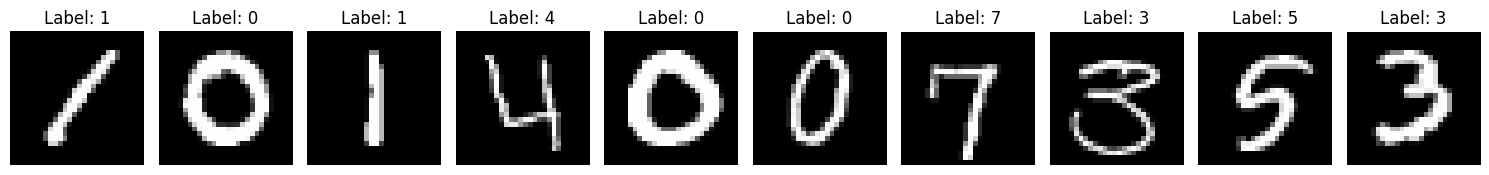

In [8]:
# Plot the first 10 images
plot_images(data.drop(columns=["label"]).values, data["label"].values)

In [9]:
# Split into features and labels
X = data.drop(columns=["label"]).values
Y = data["label"].values

In [10]:
# Normalize pixel values (0-255 -> 0-1)
X = X / 255.0

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [12]:
# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [13]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((784, 33600), (784, 8400), (1, 33600), (1, 8400))

In [15]:
# Convert Y to a 2D matrix where each row corresponds to a one-hot encoded vector
def one_hot_encode(Y, num_classes=10):
    # Create an array of zeros with shape (number_of_examples, num_classes)
    one_hot = np.zeros((Y.size, num_classes))
    # Set the appropriate indices to 1
    one_hot[np.arange(Y.size), Y] = 1
    one_hot = one_hot.T
    return one_hot

In [16]:
y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)

In [17]:
y_train.shape, y_test.shape

((10, 33600), (10, 8400))

In [18]:
y_train[:, :10]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

# Class Testing

In [19]:
# Layers dimensions
layers_dims = [X_train.shape[0], 128, 64, 32, 16, 10]

In [20]:
# Define the hyperparameters
num_iterations = 1500
learning_rate = 1e-1
keep_prob = 75e-2
lambd = 9e-1

In [51]:
# List of model configurations to test
models = {
    "Baseline": mc.DeepNeuralNetworks(layers_dims),
}

In [52]:
# Select 100 examples to test 
X_selected = X_train[:, :100]
y_selected = y_train[:, :100]

In [53]:
y_selected[:, :1]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [54]:
# Iterate through each model configuration
for model_name, model in models.items():
    print(f"Testing model: {model_name}")
    for i in range(num_iterations):
        
        AL, cache = model.L_model_forward(X_selected)
        cost = model.compute_cost(AL, y_selected)
        grads = model.L_model_backward(AL, y_selected, cache)
        parameters = model.update_parameters(grads, learning_rate)
        
        if i % 100 == 0 or i == num_iterations - 1:
            print(f"Epoch: {i}\nCost: {cost}\n")

    # Calculate accuracy
    accuracy = model.calculate_accuracy(X_selected, y_selected)
    print(f"Accuracy for {model_name}: {accuracy}%\n")

Testing model: Baseline
Epoch: 0
Cost: 2.3849061787588828

Epoch: 100
Cost: 0.018996530681743312

Epoch: 200
Cost: 0.004766913615719169

Epoch: 300
Cost: 0.0024707339461099587

Epoch: 400
Cost: 0.0016070401893503333

Epoch: 500
Cost: 0.0011665189962079265

Epoch: 600
Cost: 0.0009053337724484348

Epoch: 700
Cost: 0.000733869747261821

Epoch: 800
Cost: 0.0006137185163464279

Epoch: 900
Cost: 0.000525030971176093

Epoch: 1000
Cost: 0.00045725220793683513

Epoch: 1100
Cost: 0.0004039603980900102

Epoch: 1200
Cost: 0.000361026488614862

Epoch: 1300
Cost: 0.0003257933285775749

Epoch: 1400
Cost: 0.0002963334760375204

Epoch: 1499
Cost: 0.00027164473132114907

Accuracy for Baseline: 100.0%



# Model Testing

In [25]:
# Test the train method
model = mc.DeepNeuralNetworks(layers_dims)
params = model.fit(X_train, y_train, learning_rate=learning_rate, num_iterations=num_iterations, print_cost=True)

Cost after epoch 0: 2.388849681356903
Cost after epoch 100: 0.37966429922097905
Cost after epoch 200: 0.28873798816708407
Cost after epoch 300: 0.18169606005579234
Cost after epoch 400: 0.14729491399144387
Cost after epoch 500: 0.12604390003389299
Cost after epoch 600: 0.1055531663055137
Cost after epoch 700: 0.09062494353427672
Cost after epoch 800: 0.07866574262152361
Cost after epoch 900: 0.06872849318224736
Cost after epoch 1000: 0.060503732972207264
Cost after epoch 1100: 0.05346046632262478
Cost after epoch 1200: 0.04776227705057223
Cost after epoch 1300: 0.04216804137473432
Cost after epoch 1400: 0.03702140662182998
Cost after epoch 1499: 0.0328629089978375


In [26]:
# Test the predict method
accuracy_train = model.calculate_accuracy(X_train, y_train)
accuracy_test = model.calculate_accuracy(X_test, y_test)

In [27]:
print(f'Accuracy on the training set: {accuracy_train}% \nAccuracy on the testing set: {accuracy_test}%')

Accuracy on the training set: 99.33928571428572% 
Accuracy on the testing set: 96.63095238095238%


In [28]:
# Test the L2 method
L2_model = mc.DeepNeuralNetworks(layers_dims)
params = L2_model.fit(X_train, y_train, learning_rate=learning_rate, num_iterations=num_iterations, print_cost=True, keep_prob=1., hidden_layers_dropout=False, lambd=lambd, L2_regularization=True)

Cost after epoch 0: 2.3955905849529198
Cost after epoch 100: 0.39277868472685756
Cost after epoch 200: 0.24480048651814076
Cost after epoch 300: 0.19028169432628034
Cost after epoch 400: 0.15497875687585436
Cost after epoch 500: 0.15700069127767227
Cost after epoch 600: 0.11725862543633488
Cost after epoch 700: 0.10078780902493263
Cost after epoch 800: 0.08839753868936354
Cost after epoch 900: 0.07831752230671914
Cost after epoch 1000: 0.06984895595766184
Cost after epoch 1100: 0.06260025955750272
Cost after epoch 1200: 0.05633536410166247
Cost after epoch 1300: 0.05083136849332409
Cost after epoch 1400: 0.04593591342489073
Cost after epoch 1499: 0.04170593892255137


In [29]:
# Test the predict method
accuracy_train = L2_model.calculate_accuracy(X_train, y_train)
accuracy_test = L2_model.calculate_accuracy(X_test, y_test)

In [30]:
print(f'Accuracy on the training set: {accuracy_train}% \nAccuracy on the testing set: {accuracy_test}%')

Accuracy on the training set: 99.29166666666667% 
Accuracy on the testing set: 96.60714285714286%


In [31]:
# Test the Dropout method
dropout_model = mc.DeepNeuralNetworks(layers_dims)
params = dropout_model.fit(X_train, y_train, learning_rate=learning_rate, num_iterations=num_iterations, print_cost=True, keep_prob=keep_prob, hidden_layers_dropout=True)

Cost after epoch 0: 2.6011111582033513
Cost after epoch 100: 1.549674743246704
Cost after epoch 200: 1.0535337330904653
Cost after epoch 300: 0.8311827377309714
Cost after epoch 400: 0.6894319484757797
Cost after epoch 500: 0.5969725913704131
Cost after epoch 600: 0.5339226554843525
Cost after epoch 700: 0.48555319620043047
Cost after epoch 800: 0.4481453614353086
Cost after epoch 900: 0.4105327957543097
Cost after epoch 1000: 0.39234132055504634
Cost after epoch 1100: 0.36264867660292555
Cost after epoch 1200: 0.3472854274304927
Cost after epoch 1300: 0.32562229141970195
Cost after epoch 1400: 0.313307036691468
Cost after epoch 1499: 0.2974783751749859


In [32]:
# Test the predict method
accuracy_train = dropout_model.calculate_accuracy(X_train, y_train)
accuracy_test = dropout_model.calculate_accuracy(X_test, y_test)

In [33]:
print(f'Accuracy on the training set: {accuracy_train}% \nAccuracy on the testing set: {accuracy_test}%')

Accuracy on the training set: 97.53571428571428% 
Accuracy on the testing set: 95.64285714285714%


In [34]:
# Test the Regularization + Dropout method
regularization_dropout_model = mc.DeepNeuralNetworks(layers_dims)
params = regularization_dropout_model.fit(X_train, y_train, learning_rate=learning_rate, num_iterations=num_iterations, print_cost=True, keep_prob=keep_prob, hidden_layers_dropout=True, lambd=lambd, L2_regularization=True)

Cost after epoch 0: 2.607852061799368
Cost after epoch 100: 1.5566230692854357
Cost after epoch 200: 1.0606406772604817
Cost after epoch 300: 0.8384609319933573
Cost after epoch 400: 0.6967159157227635
Cost after epoch 500: 0.6042898569358541
Cost after epoch 600: 0.54130150495219
Cost after epoch 700: 0.4930232658049399
Cost after epoch 800: 0.45566911215134925
Cost after epoch 900: 0.41812262951262363
Cost after epoch 1000: 0.3999099476651541
Cost after epoch 1100: 0.37028697471245026
Cost after epoch 1200: 0.3551556448248168
Cost after epoch 1300: 0.3333640508350926
Cost after epoch 1400: 0.3211221722463776
Cost after epoch 1499: 0.30536492384319125


In [35]:
# Test the predict method
accuracy_train = regularization_dropout_model.calculate_accuracy(X_train, y_train)
accuracy_test = regularization_dropout_model.calculate_accuracy(X_test, y_test)

In [36]:
print(f'Accuracy on the training set: {accuracy_train}% \nAccuracy on the testing set: {accuracy_test}%')

Accuracy on the training set: 97.5297619047619% 
Accuracy on the testing set: 95.61904761904762%


# Testing the Model on the MNIST Dataset

In [37]:
# Make Prediction on the test set
test_data = pd.read_csv('test.csv')

In [50]:
# Display the shape of the test data
test_data.shape

(784, 28000)

In [38]:
# Get the values of the test data
test_data = test_data.values.T

In [39]:
# Normalize the pixel values
test_data = test_data / 255.0

In [46]:
# Make predictions
predictions = model.predict(test_data)

In [47]:
# Display the shape of the predictions
predictions.shape

(28000,)

In [48]:
# Display the first few predictions
predictions[:10]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3])

In [49]:
# Convert the predictions to a pandas dataframe
result = pd.DataFrame({
    "ImageId": range(1, len(predictions) + 1),
    "Label": predictions
    })
result.to_csv("prediction.csv", index=False)